# Import

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import time
import re
import random
import pickle
from glob import glob

# Utilisation des données journalières

In [6]:
info=pd.read_json('F:/work/download/stations_info.json')
data_info=pd.DataFrame(info.data.stations)

In [5]:
data_rep='F:/work/datasets/'
data17=pd.read_csv(data_rep+'stations_status_2023_03_17.csv')
data18=pd.read_csv(data_rep+'stations_status_2023_03_18.csv')
data19=pd.read_csv(data_rep+'stations_status_2023_03_19.csv')
data20=pd.read_csv(data_rep+'stations_status_2023_03_20.csv')


In [164]:
df1=data20
df1['time'] = pd.to_datetime(df1['time'])
df = df1.merge(data_info, on = "station_id").drop(["Unnamed: 0", "rental_methods", "stationCode"] , axis=1)
df["occupation_prct"] = 100 * df["num_bikes_available"] / df["capacity"]

t0=datetime.datetime.combine(df.iloc[0].time.date(), datetime.time()) #datetime at midnight
df['seconds_since_midnight']=(pd.to_timedelta(df.time-t0, unit='s').values/1e9).astype('int')

df

,station_id,num_bikes_available,num_bikes_available_mech,num_bikes_available_elec,num_docks_available,is_installed,is_returning,is_renting,last_reported,time,weekday,hour,name,lat,lon,capacity,occupation_prct,seconds_since_midnight
0,213688169,6,2.0,4.0,29,1,1,1,1679264946,2023-03-20 00:00:18,0,2023-03-21 00:00:18,Benjamin Godard - Victor Hugo,48.865983,2.275725,35,17.142857,18
1,213688169,6,2.0,4.0,29,1,1,1,1679264946,2023-03-20 00:02:17,0,2023-03-21 00:02:17,Benjamin Godard - Victor Hugo,48.865983,2.275725,35,17.142857,137
2,213688169,6,2.0,4.0,29,1,1,1,1679264946,2023-03-20 00:04:18,0,2023-03-21 00:04:18,Benjamin Godard - Victor Hugo,48.865983,2.275725,35,17.142857,258
3,213688169,6,2.0,4.0,29,1,1,1,1679264946,2023-03-20 00:06:17,0,2023-03-21 00:06:17,Benjamin Godard - Victor Hugo,48.865983,2.275725,35,17.142857,377
4,213688169,5,2.0,3.0,30,1,1,1,1679264946,2023-03-20 00:08:18,0,2023-03-21 00:08:18,Benjamin Godard - Victor Hugo,48.865983,2.275725,35,14.285714,498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039605,315022587,1,0.0,1.0,63,1,1,1,1679351341,2023-03-20 23:49:01,0,2023-03-21 23:49:01,Malesherbes - Place de la Madeleine,48.870406,2.323244,67,1.492537,85741
1039606,315022587,1,0.0,1.0,63,1,1,1,1679351341,2023-03-20 23:52:01,0,2023-03-21 23:52:01,Malesherbes - Place de la Madeleine,48.870406,2.323244,67,1.492537,85921
1039607,315022587,1,0.0,1.0,63,1,1,1,1679351341,2023-03-20 23:54:01,0,2023-03-21 23:54:01,Malesherbes - Place de la Madeleine,48.870406,2.323244,67,1.492537,86041
1039608,315022587,1,0.0,1.0,63,1,1,1,1679351341,2023-03-20 23:56:01,0,2023-03-21 23:56:01,Malesherbes - Place de la Madeleine,48.870406,2.323244,67,1.492537,86161


In [9]:
station_list=list(data_info.station_id)
station_red=random.sample(station_list, 50)

In [ ]:
#Lissage des courbes :
data20['num_bikes_smoothed']=data20['num_bikes_available']

In [ ]:
x=df[ df['station_id'] == station_list[0]].time.tolist()
x=[datetime.datetime.strptime(i, '%Y-%m-%d %H:%M:%S') for i in x]

Text(0, 0.5, 'Number of bikes available')

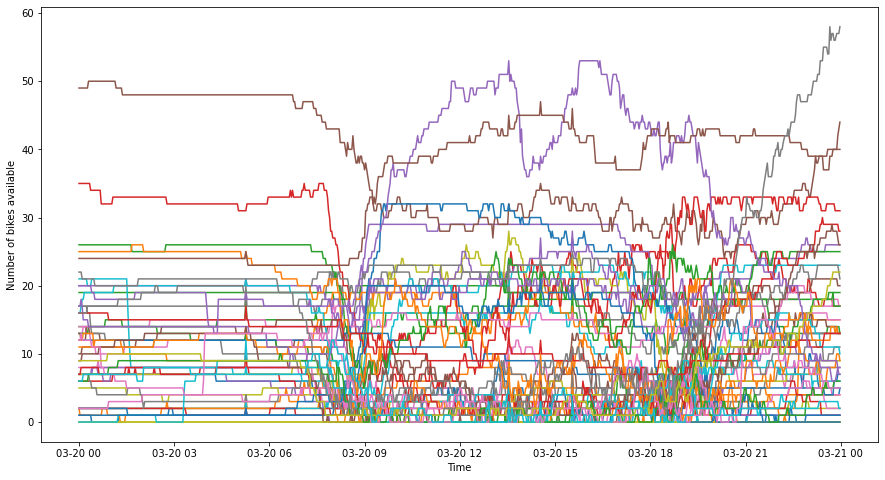

In [90]:
df=data20

plt.figure(figsize=(15,8))
for station in station_red:
               plt.plot(x, 'num_bikes_available', data=df[ df['station_id'] == station])

# y_day_delim=[0,df.num_bikes_available.max()]
# x_day_delim1=[datetime.datetime(2023,3,18),datetime.datetime(2023,3,18)]
# x_day_delim2=[datetime.datetime(2023,3,19),datetime.datetime(2023,3,19)]
# x_day_delim3=[datetime.datetime(2023,3,20),datetime.datetime(2023,3,20)]
# plt.plot(x_day_delim1, y_day_delim, color='black', linestyle='dotted')
# plt.plot(x_day_delim2, y_day_delim, color='black', linestyle='dotted')
# plt.plot(x_day_delim3, y_day_delim, color='black', linestyle='dotted')
plt.xlabel('Time')
plt.ylabel('Number of bikes available')

Text(0, 0.5, 'Number of bikes available')

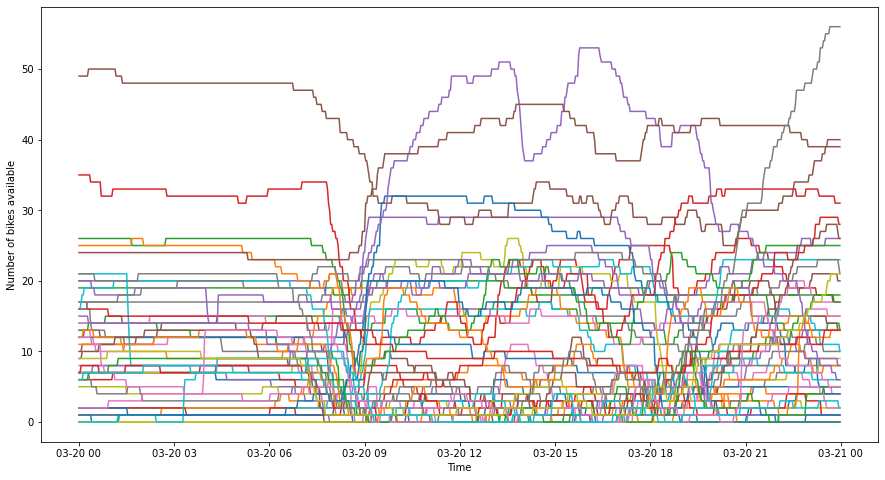

In [93]:
#effet du lissage des courbes :
import scipy.signal as sig
df=data20

plt.figure(figsize=(15,8))
for station in station_red:
    df_temp=df[ df['station_id'] == station]
    
    y=df_temp.num_bikes_available.tolist()
    y=sig.medfilt(y, kernel_size=15)
#     mi=np.min(y)
#     ma=np.max(y)
#     if ma-mi == 0 : continue
#     plt.plot(x, (y-mi)/(ma-mi) )
    plt.plot(x, y )


plt.xlabel('Time')
plt.ylabel('Number of bikes available')


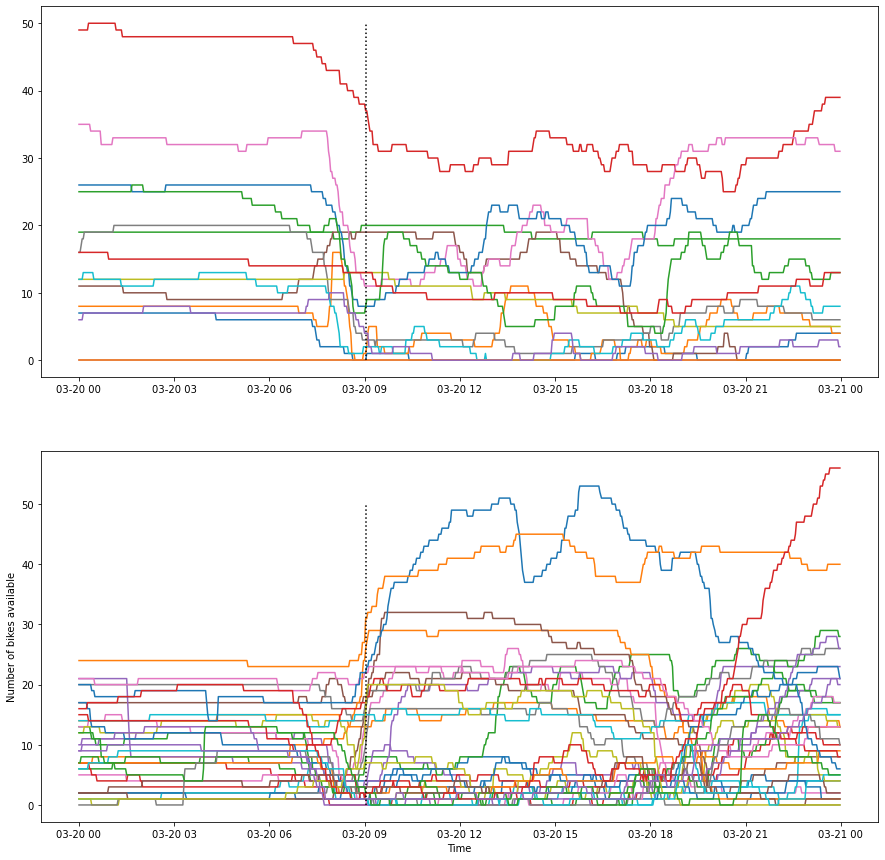

In [110]:
#Tracé seulement des courbes avec un maximum pendant la nuit / à midi

fig, axs = plt.subplots(2, figsize=(15,15))

df=data20

xsplit=270

for station in station_red:
    df_temp=df[ df['station_id'] == station]
    
    y=df_temp.num_bikes_available.tolist()
    y=sig.medfilt(y, kernel_size=15)
    
    if np.argmax(y) < xsplit : axs[0].plot(x, y )
    if np.argmax(y) > xsplit : axs[1].plot(x, y )

plt.xlabel('Time')
plt.ylabel('Number of bikes available')

axs[0].plot([x[xsplit],x[xsplit]], [0,50], color='black', linestyle='dotted')
axs[1].plot([x[xsplit],x[xsplit]], [0,50], color='black', linestyle='dotted')


On pourrait utiliser ce genre de séparation pour entrainer deux modèles de stations

In [ ]:
## 